# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

OBSERVATIONS:
1. There is definetly a direct relationship between latitude location and maximum temperatues. The highest maximum temperatures are found near 0, concentrated between -20 and 20. This is due to the sun's direct angle at this part of the Earth. As the latitude's move away from 0, temperatures drop. 

2. There appears to be no direct relationship between latitude location and humidity, wind, and cloudiness. 
These weather conditions may be effected by other factors unrelated to latitude. All have r-values that pointed to weak or no correlations.

3. The northern hemisphere's correlation of latitude location and maximum temperates are stronger than that of the southern hemisphere. The southern hemisphere may not have this strong of a relationship due to there being more bodies of water and less land compared to the northern hemisphere. The large bodies of water may be factor in the varying tempatures.

In [ ]:
#! pip install citipy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key



# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [3]:
# set up base url with units in imperial
url = "http://api.openweathermap.org/data/2.5/weather?"
units="imperial"
query_url=f"{url}appid={weather_api_key}&units={units}&q="


# create empty lists to hold data
city_list = []
lat_list = []
lng_list = []
maxtemp_list = []
humidity_list = []
cloudiness_list = []
windspeed_list = []
country_list = []
date_list = []

print("Beginning Data Retrieval")
print("-----------------------------")

# set counters for data looping
record = 0
sets = 1

# gather weather data for cities
for index, city in enumerate(cities):
    try:
        response = requests.get(query_url + city).json()
        city_list.append(response["name"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        maxtemp_list.append(response["main"]["temp_max"])
        humidity_list.append(response["main"]["humidity"])
        cloudiness_list.append(response["clouds"]["all"])
        windspeed_list.append(response["wind"]["speed"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        
        #keep adding records and reset when record reaches 50
        if record == 50:
            record = 0
            sets = sets + 1
       
        else:
            record = record + 1
        
        # print out data
        print(f"Processing Record {record} of Set {sets} | {city}")
        
    except:
        print("City not found. Skipping...")


print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")




Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | flinders
Processing Record 2 of Set 1 | sept-iles
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | ekibastuz
City not found. Skipping...
Processing Record 5 of Set 1 | marienburg
Processing Record 6 of Set 1 | aktau
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | kaitangata
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | georgetown
Processing Record 13 of Set 1 | kyzyl-suu
Processing Record 14 of Set 1 | oria
Processing Record 15 of Set 1 | upernavik
City not found. Skipping...
Processing Record 16 of Set 1 | yellowknife
City not found. Skipping...
Processing Record 17 of Set 1 | bathsheba
Processing Record 18 of Set 1 | port-cartier
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | kakonko
City not found. Skipping...
Proces

Processing Record 31 of Set 4 | clyde river
Processing Record 32 of Set 4 | dunedin
Processing Record 33 of Set 4 | aquiraz
Processing Record 34 of Set 4 | cartagena
Processing Record 35 of Set 4 | krasnoselkup
Processing Record 36 of Set 4 | ghanzi
Processing Record 37 of Set 4 | bay city
Processing Record 38 of Set 4 | xiongzhou
Processing Record 39 of Set 4 | yulara
Processing Record 40 of Set 4 | saint-joseph
Processing Record 41 of Set 4 | saint-georges
Processing Record 42 of Set 4 | pilar
Processing Record 43 of Set 4 | obo
Processing Record 44 of Set 4 | rio grande
Processing Record 45 of Set 4 | yazykovo
Processing Record 46 of Set 4 | port elizabeth
Processing Record 47 of Set 4 | carson city
Processing Record 48 of Set 4 | limburg
Processing Record 49 of Set 4 | geraldton
Processing Record 50 of Set 4 | hovd
Processing Record 0 of Set 5 | lata
Processing Record 1 of Set 5 | iberia
City not found. Skipping...
Processing Record 2 of Set 5 | derzhavinsk
Processing Record 3 of S

Processing Record 14 of Set 8 | inhambane
Processing Record 15 of Set 8 | olecko
Processing Record 16 of Set 8 | darhan
City not found. Skipping...
Processing Record 17 of Set 8 | saint-pierre
Processing Record 18 of Set 8 | wuda
Processing Record 19 of Set 8 | gibara
Processing Record 20 of Set 8 | saint george
Processing Record 21 of Set 8 | andenes
Processing Record 22 of Set 8 | nampula
Processing Record 23 of Set 8 | beira
Processing Record 24 of Set 8 | kandrian
Processing Record 25 of Set 8 | victoria
Processing Record 26 of Set 8 | tilichiki
Processing Record 27 of Set 8 | lagoa
Processing Record 28 of Set 8 | panalingaan
Processing Record 29 of Set 8 | hobyo
Processing Record 30 of Set 8 | sambava
Processing Record 31 of Set 8 | roma
City not found. Skipping...
Processing Record 32 of Set 8 | lexington
Processing Record 33 of Set 8 | monrovia
Processing Record 34 of Set 8 | dudinka
Processing Record 35 of Set 8 | santa fe
Processing Record 36 of Set 8 | hami
Processing Record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# convert to dataframe and set column names
df = pd.DataFrame({
    "City": city_list,
    "Lat": lat_list,
    "Lng": lng_list,
    "Max Temp": maxtemp_list,
    "Humidity": humidity_list,
    "Cloudiness": cloudiness_list,
    "Wind Speed": windspeed_list,
    "Country": country_list,
    "Date": date_list
})

df.reset_index()

# send to csv file in output_data directory
df.to_csv("output_data/city_weather.csv", index=False)

#show output of dataframe
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Flinders,-34.5833,150.8552,65.21,87,23,4.00,AU,1644956338
1,Sept-Îles,50.2001,-66.3821,8.06,55,75,19.57,CA,1644956338
2,Albany,42.6001,-73.9662,28.81,49,100,3.00,US,1644956338
3,Ekibastuz,51.6667,75.3667,0.05,92,75,14.81,KZ,1644956339
4,Malbork,54.0359,19.0266,45.12,80,100,9.10,PL,1644956339


In [5]:
df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,5.530000e+02
mean,21.506026,17.730060,49.152423,72.215190,56.236890,8.255986,1.644956e+09
std,32.685654,87.955808,33.752519,22.191663,40.321982,5.837018,8.734094e+01
min,-54.800000,-175.200000,-42.810000,9.000000,0.000000,0.000000,1.644956e+09
25%,-5.089200,-60.279800,29.430000,60.000000,13.000000,3.980000,1.644956e+09
50%,25.258200,22.507000,61.590000,77.000000,65.000000,6.910000,1.644956e+09
75%,47.720000,92.265800,76.600000,89.000000,100.000000,11.120000,1.644956e+09
max,78.218600,179.316700,99.250000,100.000000,100.000000,44.780000,1.644957e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
checkhumidity=df.index[df["Humidity"]>=100].tolist()
print(checkhumidity)

[58, 60, 89, 100, 104, 119, 172, 205, 213, 252, 253, 272, 303, 332, 342, 426, 429, 473, 494, 499, 500, 514, 521]


In [7]:
#  Get the indices of cities that have humidity over 100%.
humiditydrop=df.index[df['Humidity']>=100]
print(humiditydrop)

Int64Index([ 58,  60,  89, 100, 104, 119, 172, 205, 213, 252, 253, 272, 303,
            332, 342, 426, 429, 473, 494, 499, 500, 514, 521],
           dtype='int64')


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data=df.drop(humiditydrop, inplace=False)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Flinders,-34.5833,150.8552,65.21,87,23,4.00,AU,1644956338
1,Sept-Îles,50.2001,-66.3821,8.06,55,75,19.57,CA,1644956338
2,Albany,42.6001,-73.9662,28.81,49,100,3.00,US,1644956338
3,Ekibastuz,51.6667,75.3667,0.05,92,75,14.81,KZ,1644956339
4,Malbork,54.0359,19.0266,45.12,80,100,9.10,PL,1644956339
...,...,...,...,...,...,...,...,...,...
548,Usinsk,65.9939,57.5281,19.27,95,100,15.88,RU,1644956549
549,Guarapari,-20.6667,-40.4975,76.89,90,100,5.68,BR,1644956454
550,Tūkrah,32.5341,20.5791,56.30,62,87,6.40,LY,1644956549
551,Kaniama,-7.5667,24.1833,65.41,95,94,3.09,CD,1644956550


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

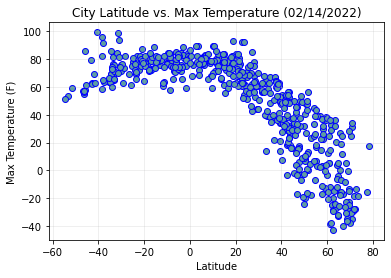

In [9]:
#Create scatter plot for latitude vs. max temp
plt.scatter(df["Lat"], df["Max Temp"],facecolor="cadetblue", edgecolor="b")

#add details to plot
plt.title("City Latitude vs. Max Temperature (02/14/2022)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(alpha=0.25)

#save plot to png file
plt.savefig("output_data/lat_vs_temp_plot.png")

The plot shows that there is a relationship with latitude location and max temperature. Most of the highest max temperature plots are close to 0 latitude, the equator where the sun is most directly focused. The lowest max temperature plots are located at latitude locations of >40. Suggesting that that part of the Earth has the lowest max temperatues. 

## Latitude vs. Humidity Plot

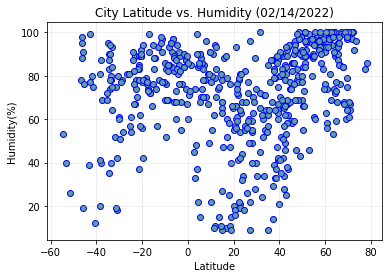

In [10]:
#Create scatter plot for latitude vs. max temp
plt.scatter(df["Lat"], df["Humidity"],facecolor="cadetblue", edgecolor="b")

#add details to plot
plt.title("City Latitude vs. Humidity (02/14/2022)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid(alpha=0.25)

#save plot to png file
plt.savefig("output_data/lat_vs_humidity_plot.png")

The city plots don't appear to show a trend, thus no ture relationship between latitude and humidity. 

## Latitude vs. Cloudiness Plot

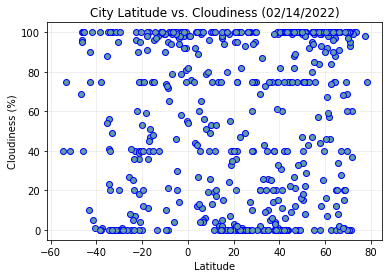

In [11]:
#Create scatter plot for latitude vs. max temp
plt.scatter(df["Lat"], df["Cloudiness"],facecolor="cadetblue", edgecolor="b")

#add details to plot
plt.title("City Latitude vs. Cloudiness (02/14/2022)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(alpha=0.25)

#save plot to png file
plt.savefig("output_data/lat_vs_cloudiness_plot.png")

The city plots don't appear to show a trend, thus no ture relationship between latitude and cloudiness. 

## Latitude vs. Wind Speed Plot

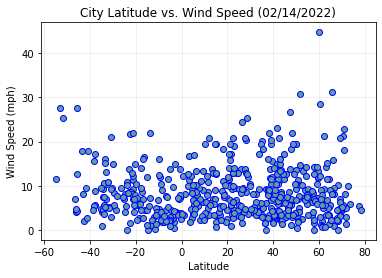

In [12]:
#Create scatter plot for latitude vs. max temp
plt.scatter(df["Lat"], df["Wind Speed"],facecolor="cadetblue", edgecolor="b")

#add details to plot
plt.title("City Latitude vs. Wind Speed (02/14/2022)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(alpha=0.25)

#save plot to png file
plt.savefig("output_data/lat_vs_wind_plot.png")

The city plots appeart to have similar wind speeds no matter the latitude location.

## Linear Regression

In [13]:
north_hem = df.loc[df["Lat"] >= 0, :]
south_hem = df.loc[df["Lat"] < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7438778264451897


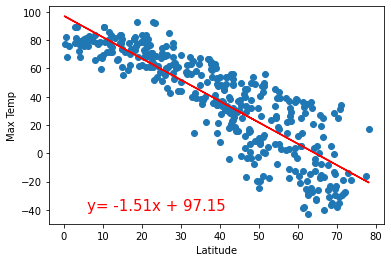

In [14]:
x_values= north_hem["Lat"]
y_values= north_hem["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values=x_values * slope + intercept
line_eq="y= " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6,-40), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-value is: {rvalue**2}")
plt.savefig("output_data/north_hem_temp_v_lat_plot.png")
plt.show()

The appears to be a strong negative correlation between latitude and max temp in the northern hemisphere.  The r- value of 0.74 suggests that the relation is strong which means max temp relates well with the city's latitude location.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.1471870856556408


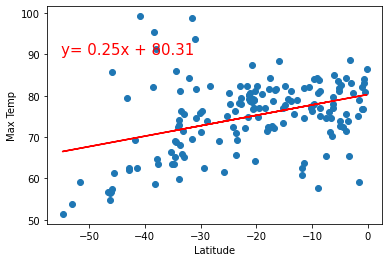

In [16]:
x_values= south_hem["Lat"]
y_values= south_hem["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values=x_values * slope + intercept
line_eq="y= " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-55,90), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-value is: {rvalue**2}")
plt.savefig("output_data/south_hem_temp_v_lat_plot.png")
plt.show()

There appears to be a weak positive correlation between the southern hemisphere's latitude and max temp. The r-value of 0.14 points to the relationship being weak and not as strong as the northern hemisphere's correlation. However, as the latitude decreases, max temps appear to decrease also.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.17487732538256195


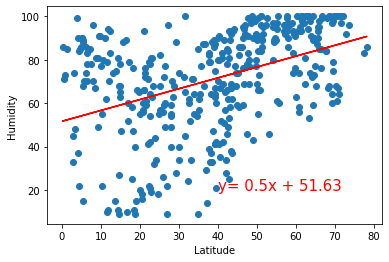

In [23]:
x_values= north_hem["Lat"]
y_values= north_hem["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values=x_values * slope + intercept
line_eq="y= " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (40,20), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue**2}")
plt.savefig("output_data/north_hem_humudity_v_lat_plot.png")
plt.show()

The city plots have a weak positive correlation between the latitude location and humidity.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.11868825730116644


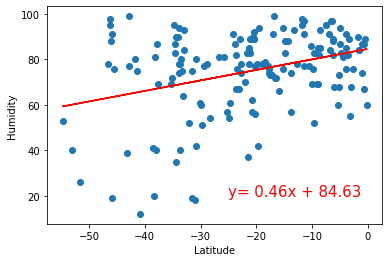

In [24]:
x_values= south_hem["Lat"]
y_values= south_hem["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values=x_values * slope + intercept
line_eq="y= " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-25,20), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue**2}")
plt.savefig("output_data/south_hem_humudity_v_lat_plot.png")
plt.show()

The southern hemisphere appears to have no correlation between city latitude and humidity. The r-value of 0.11 is less than the northern hemisphere's r-value. Thus, the southern hemisphere's latitude relationship with humidity is weaker. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.03454573752650413


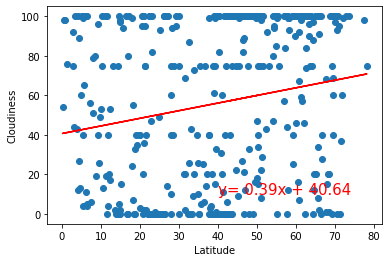

In [25]:
x_values= north_hem["Lat"]
y_values= north_hem["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values=x_values * slope + intercept
line_eq="y= " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (40,10), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {rvalue**2}")
plt.savefig("output_data/north_hem_cloudiness_v_lat_plot.png")
plt.show()

The northern hemisphere appears to have no correlation between latitude and cloudiness. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.08639153599722811


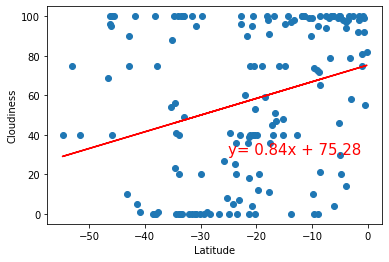

In [26]:
x_values= south_hem["Lat"]
y_values= south_hem["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values=x_values * slope + intercept
line_eq="y= " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-25,30), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {rvalue**2}")
plt.savefig("output_data/south_hem_cloudiness_v_lat_plot.png")
plt.show()

The southern hemisphere also appears to have no correlation between latitude and cloudiness. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.001055258860934247


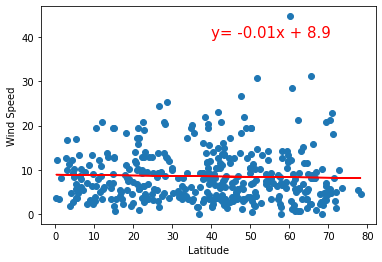

In [27]:
x_values= north_hem["Lat"]
y_values= north_hem["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values=x_values * slope + intercept
line_eq="y= " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (40,40), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is: {rvalue**2}")
plt.savefig("output_data/north_hem_wind_v_lat_plot.png")
plt.show()

The northern hemisphere appears to have no correlation between latitude and cloudiness. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.12348191053851167


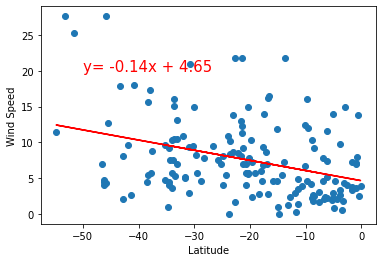

In [28]:
x_values= south_hem["Lat"]
y_values= south_hem["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values=x_values * slope + intercept
line_eq="y= " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-50,20), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is: {rvalue**2}")
plt.savefig("output_data/south_hem_wind_v_lat_plot.png")
plt.show()


The southern hemisphere aslo appears to have no correlation between latitude and cloudiness. 